### Data sources:  
Life index - <https://stats.oecd.org/index.aspx?DataSetCode=BLI>  
GDP - <https://www.imf.org/en/Publications/SPROLLs/world-economic-outlook-databases>

The file downloaded from IMF website could not be read using pandas, I have converted the file to CSV format using Microsoft Excel.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 

%matplotlib inline
plt.rcParams["figure.dpi"]=150

In [2]:
# load only follwing cols
bli = pd.read_csv("../datasets/OECD_Better_Life_Index.csv", \
                  usecols=["LOCATION", "Country", "Indicator", "Value"])
# select only life satisfaction
bli = bli.loc[bli['Indicator'] == 'Life satisfaction']
bli.head()

,LOCATION,Country,Indicator,Value
1813,AUS,Australia,Life satisfaction,7.3
1814,AUT,Austria,Life satisfaction,7.1
1815,BEL,Belgium,Life satisfaction,6.9
1816,CAN,Canada,Life satisfaction,7.4
1817,CZE,Czech Republic,Life satisfaction,6.7


In [3]:
gdp = pd.read_csv("../datasets/IMF_GDP_list.csv", usecols=["ISO", "2020"], thousands=",")
gdp.head()

,ISO,2020
0,AFG,19.132
1,ALB,15.147
2,DZA,144.294
3,AGO,62.440
4,ATG,1.390


In [4]:
df = bli.merge(gdp, left_on = 'LOCATION', right_on = 'ISO', how='left')
df.head()

,LOCATION,Country,Indicator,Value,ISO,2020
0,AUS,Australia,Life satisfaction,7.3,AUS,1359.330
1,AUT,Austria,Life satisfaction,7.1,AUT,428.622
2,BEL,Belgium,Life satisfaction,6.9,BEL,513.087
3,CAN,Canada,Life satisfaction,7.4,CAN,1643.410
4,CZE,Czech Republic,Life satisfaction,6.7,CZE,241.455


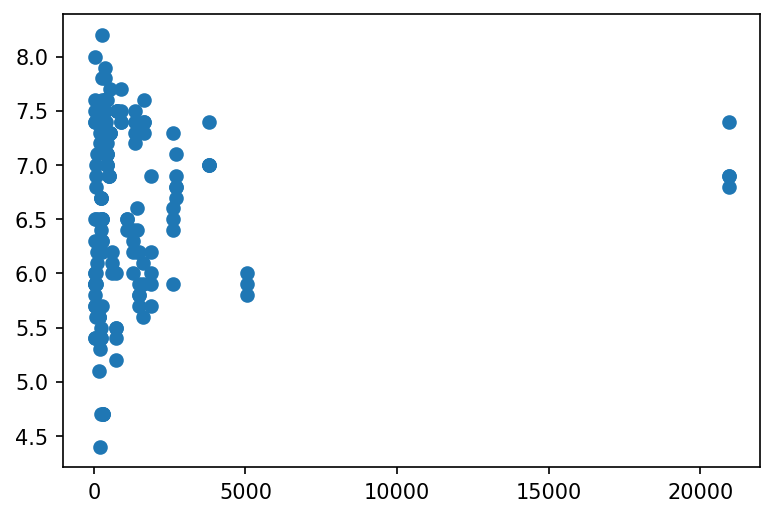

In [5]:
plt.scatter(df["2020"], df["Value"])
plt.show()